##### problem Statement

The problem statement for this project revolves around the need for an accurate and reliable method to predict laptop prices using linear regression, as existing pricing information lacks consistency and hinders consumers' ability to make informed choices when purchasing laptops.

###### Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Data Processing

In [3]:
#read the data
data = pd.read_csv('laptop_data.csv')

#printing the first few rows of the data
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
#shape of the Dataset
data.shape

(1303, 12)

In [5]:
#data types of the features
data.dtypes

Unnamed: 0            int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

Object represents that the particular column is Categorical and the int64 represents that the column is numerical and float64 represents that the particular column consists of folat values.

In [6]:
# additional information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


'Information' command gives as the information of every column of the dataset like no. of observations, Null count and data type. No need to treat the missing values because there are no Missing values in our Dataset.

In [7]:
# Duplicated Values
data.duplicated().sum()

0

In [8]:
#Droping the Unneccesary column 
data.drop(columns=['Unnamed: 0'], inplace = True)
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
# Deleting the specification from the Ram feature
data['Ram'] = data['Ram'].str.replace('GB', '')
data['Weight'] = data['Weight'].str.replace('kg', '')
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [10]:
# Converting the datatypes
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
dtype: object

In [11]:
data['DisplayType'] = ""
data['ScreenResolution_XY'] = ""

for index, row in data.iterrows():
    resolution_parts = row['ScreenResolution'].split()
    DisplayType = " ".join(resolution_parts[:-1])
    ScreenResolution_XY = resolution_parts[-1]
    
    data.at[index, 'DisplayType'] = DisplayType
    data.at[index, 'ScreenResolution_XY'] = ScreenResolution_XY
data.drop('ScreenResolution', axis=1, inplace=True)

data[['ScreenResolution_x', 'ScreenResolution_y']] = data['ScreenResolution_XY'].str.split('x', expand=True)
data.drop('ScreenResolution_XY', axis=1, inplace=True)
data.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,DisplayType,ScreenResolution_x,ScreenResolution_y
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS Panel Retina Display,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Full HD,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS Panel Retina Display,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS Panel Retina Display,2560,1600


In [12]:
data['CpuBrand']=''
data['CpuSpeed']=''

for index, row in data.iterrows():
    Cpu_parts = row['Cpu'].split()
    CpuBrand = " ".join(Cpu_parts[:-1])
    CpuSpeed = Cpu_parts[-1]
    
    data.at[index, 'CpuBrand'] = CpuBrand
    data.at[index, 'CpuSpeed'] = CpuSpeed
data['CpuSpeed'] = data['CpuSpeed'].str.replace('GHz', '')
data.drop(columns=['Cpu'], inplace=True)
data.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,DisplayType,ScreenResolution_x,ScreenResolution_y,CpuBrand,CpuSpeed
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,IPS Panel Retina Display,2560,1600,Intel Core i5,2.3
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,,1440,900,Intel Core i5,1.8
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,Full HD,1920,1080,Intel Core i5 7200U,2.5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,IPS Panel Retina Display,2880,1800,Intel Core i7,2.7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,IPS Panel Retina Display,2560,1600,Intel Core i5,3.1


In [13]:
data['GpuModel'] = ''
data['GpuUnits'] = ''

for index, row in data.iterrows():
    Gpu_parts = row['Gpu'].split()
    GpuModel = " ".join(Gpu_parts[:-1])
    GpuUnits = Gpu_parts[-1]
    
    data.at[index, 'GpuModel'] = GpuModel
    data.at[index, 'GpuUnits'] = GpuUnits

data.drop(columns=['Gpu'], inplace=True)
data.head()

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,DisplayType,ScreenResolution_x,ScreenResolution_y,CpuBrand,CpuSpeed,GpuModel,GpuUnits
0,Apple,Ultrabook,13.3,8,128GB SSD,macOS,1.37,71378.6832,IPS Panel Retina Display,2560,1600,Intel Core i5,2.3,Intel Iris Plus Graphics,640
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,macOS,1.34,47895.5232,,1440,900,Intel Core i5,1.8,Intel HD Graphics,6000
2,HP,Notebook,15.6,8,256GB SSD,No OS,1.86,30636.0000,Full HD,1920,1080,Intel Core i5 7200U,2.5,Intel HD Graphics,620
3,Apple,Ultrabook,15.4,16,512GB SSD,macOS,1.83,135195.3360,IPS Panel Retina Display,2880,1800,Intel Core i7,2.7,AMD Radeon Pro,455
4,Apple,Ultrabook,13.3,8,256GB SSD,macOS,1.37,96095.8080,IPS Panel Retina Display,2560,1600,Intel Core i5,3.1,Intel Iris Plus Graphics,650


In [14]:
data['Memory_SSD'] = ''
for index, row in data.iterrows():
    Memory_size = row['Memory'].split()
    Memory_SSD = " ".join(Memory_size[:-1])
    data.at[index,'Memory_SSD'] = Memory_SSD
data.drop(columns = ['Memory'], inplace=True)
data.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,DisplayType,ScreenResolution_x,ScreenResolution_y,CpuBrand,CpuSpeed,GpuModel,GpuUnits,Memory_SSD
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,IPS Panel Retina Display,2560,1600,Intel Core i5,2.3,Intel Iris Plus Graphics,640,128GB
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,,1440,900,Intel Core i5,1.8,Intel HD Graphics,6000,128GB Flash
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Full HD,1920,1080,Intel Core i5 7200U,2.5,Intel HD Graphics,620,256GB
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,IPS Panel Retina Display,2880,1800,Intel Core i7,2.7,AMD Radeon Pro,455,512GB
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,IPS Panel Retina Display,2560,1600,Intel Core i5,3.1,Intel Iris Plus Graphics,650,256GB


In [15]:


import re
# Extract memory size (numeric value) and remove extra text
data['Memory_Size'] = data['Memory_SSD'].apply(lambda x: re.findall(r'\d+', x)[0])
data.drop(columns=['Memory_SSD'],inplace=True)
data.rename(columns={'Memory_Size': 'Memory_SSD'}, inplace=True)
data.rename(columns={'Ram':'Ram_GB'}, inplace = True)
data.head()

,Company,TypeName,Inches,Ram_GB,OpSys,Weight,Price,DisplayType,ScreenResolution_x,ScreenResolution_y,CpuBrand,CpuSpeed,GpuModel,GpuUnits,Memory_SSD
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,IPS Panel Retina Display,2560,1600,Intel Core i5,2.3,Intel Iris Plus Graphics,640,128
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,,1440,900,Intel Core i5,1.8,Intel HD Graphics,6000,128
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Full HD,1920,1080,Intel Core i5 7200U,2.5,Intel HD Graphics,620,256
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,IPS Panel Retina Display,2880,1800,Intel Core i7,2.7,AMD Radeon Pro,455,512
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,IPS Panel Retina Display,2560,1600,Intel Core i5,3.1,Intel Iris Plus Graphics,650,256


In [16]:
label = data[['Price']]
data.drop(columns=['Price'], inplace=True)

In [17]:
df = pd.concat([data,label], axis=1)
df.head()

,Company,TypeName,Inches,Ram_GB,OpSys,Weight,DisplayType,ScreenResolution_x,ScreenResolution_y,CpuBrand,CpuSpeed,GpuModel,GpuUnits,Memory_SSD,Price
0,Apple,Ultrabook,13.3,8,macOS,1.37,IPS Panel Retina Display,2560,1600,Intel Core i5,2.3,Intel Iris Plus Graphics,640,128,71378.6832
1,Apple,Ultrabook,13.3,8,macOS,1.34,,1440,900,Intel Core i5,1.8,Intel HD Graphics,6000,128,47895.5232
2,HP,Notebook,15.6,8,No OS,1.86,Full HD,1920,1080,Intel Core i5 7200U,2.5,Intel HD Graphics,620,256,30636.0000
3,Apple,Ultrabook,15.4,16,macOS,1.83,IPS Panel Retina Display,2880,1800,Intel Core i7,2.7,AMD Radeon Pro,455,512,135195.3360
4,Apple,Ultrabook,13.3,8,macOS,1.37,IPS Panel Retina Display,2560,1600,Intel Core i5,3.1,Intel Iris Plus Graphics,650,256,96095.8080


In [18]:
#shape of the data
df.shape

(1303, 15)

In [19]:
#check for Null Values
df.isnull().sum()

Company               0
TypeName              0
Inches                0
Ram_GB                0
OpSys                 0
Weight                0
DisplayType           0
ScreenResolution_x    0
ScreenResolution_y    0
CpuBrand              0
CpuSpeed              0
GpuModel              0
GpuUnits              0
Memory_SSD            0
Price                 0
dtype: int64

In [20]:
# replacing empty records with std null values
df.replace('',np.NaN, inplace=True)
df.isnull().sum()

Company                 0
TypeName                0
Inches                  0
Ram_GB                  0
OpSys                   0
Weight                  0
DisplayType           314
ScreenResolution_x      0
ScreenResolution_y      0
CpuBrand                0
CpuSpeed                0
GpuModel                0
GpuUnits                0
Memory_SSD              0
Price                   0
dtype: int64

In [21]:
#filling null values with mode
mode_value = df['DisplayType'].mode().values[0]  # Get the mode value
df['DisplayType'].fillna(mode_value, inplace=True)
df.isnull().sum()

Company               0
TypeName              0
Inches                0
Ram_GB                0
OpSys                 0
Weight                0
DisplayType           0
ScreenResolution_x    0
ScreenResolution_y    0
CpuBrand              0
CpuSpeed              0
GpuModel              0
GpuUnits              0
Memory_SSD            0
Price                 0
dtype: int64

In [22]:
#check for duplicates
df.duplicated().sum()

29

In [23]:
#data types of the features
df.dtypes

Company                object
TypeName               object
Inches                float64
Ram_GB                  int32
OpSys                  object
Weight                float32
DisplayType            object
ScreenResolution_x     object
ScreenResolution_y     object
CpuBrand               object
CpuSpeed               object
GpuModel               object
GpuUnits               object
Memory_SSD             object
Price                 float64
dtype: object

In [24]:
# changing the data types
df['ScreenResolution_x'] = df['ScreenResolution_x'].astype('int32')
df['ScreenResolution_y'] = df['ScreenResolution_y'].astype('int32')
df['CpuSpeed'] = df['CpuSpeed'].astype('float32')
df['GpuUnits'] = pd.to_numeric(data['GpuUnits'], errors='coerce')
df['Memory_SSD'] = df['Memory_SSD'].astype('int32')

df.dtypes

Company                object
TypeName               object
Inches                float64
Ram_GB                  int32
OpSys                  object
Weight                float32
DisplayType            object
ScreenResolution_x      int32
ScreenResolution_y      int32
CpuBrand               object
CpuSpeed              float32
GpuModel               object
GpuUnits              float64
Memory_SSD              int32
Price                 float64
dtype: object

##### Measures of Central Tendency

In [25]:
# Calculating the Mean
mean_df = df.mean()
mean_df

Inches                   15.017191
Ram_GB                    8.382195
Weight                    2.038733
ScreenResolution_x     1894.784344
ScreenResolution_y     1070.830391
CpuSpeed                  2.298777
GpuUnits                684.804772
Memory_SSD              226.408289
Price                 59870.042910
dtype: float64

In [26]:
#calculating the Median
median_df = df.median()
median_df

Inches                   15.60
Ram_GB                    8.00
Weight                    2.04
ScreenResolution_x     1920.00
ScreenResolution_y     1080.00
CpuSpeed                  2.50
GpuUnits                620.00
Memory_SSD              256.00
Price                 52054.56
dtype: float64

In [27]:
#calculating the mode
mode_df = df.mode()
mode_df

,Company,TypeName,Inches,Ram_GB,OpSys,Weight,DisplayType,ScreenResolution_x,ScreenResolution_y,CpuBrand,CpuSpeed,GpuModel,GpuUnits,Memory_SSD,Price
0,Dell,Notebook,15.6,8.0,Windows 10,2.2,Full HD,1920.0,1080.0,Intel Core i5 7200U,2.5,Intel HD Graphics,620.0,256.0,58554.72
1,Lenovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79866.72
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95850.72


##### Measures of Dispersion

In [28]:
#Range

In [29]:
#Variance
var_df = df.var()
var_df

Inches                2.034343e+00
Ram_GB                2.585381e+01
Weight                4.428566e-01
ScreenResolution_x    2.446697e+05
ScreenResolution_y    8.095129e+04
CpuSpeed              2.563805e-01
GpuUnits              2.384461e+05
Memory_SSD            3.048850e+04
Price                 1.387056e+09
dtype: float64

In [30]:
#standard deviation
std_dev_df = df.std()
std_dev_df

Inches                    1.426304
Ram_GB                    5.084665
Weight                    0.665475
ScreenResolution_x      494.641028
ScreenResolution_y      284.519410
CpuSpeed                  0.506340
GpuUnits                488.309383
Memory_SSD              174.609551
Price                 37243.201786
dtype: float64

##### Univariate Analysis

<AxesSubplot:xlabel='Price', ylabel='Density'>

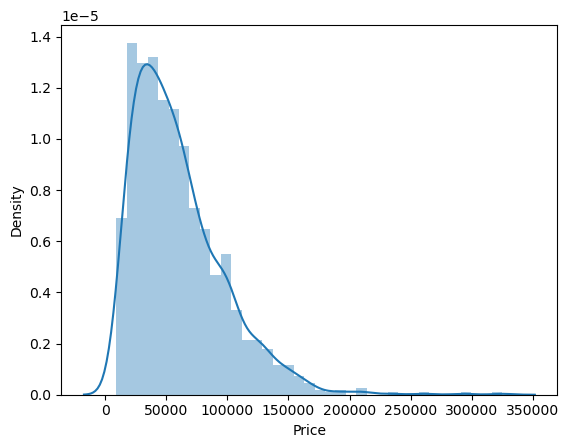

In [31]:
#distribution of Price feature
sns.distplot(df['Price'])

Our data is right skewed which indicates that most of the laptops are under the price of 150000.

<AxesSubplot:>

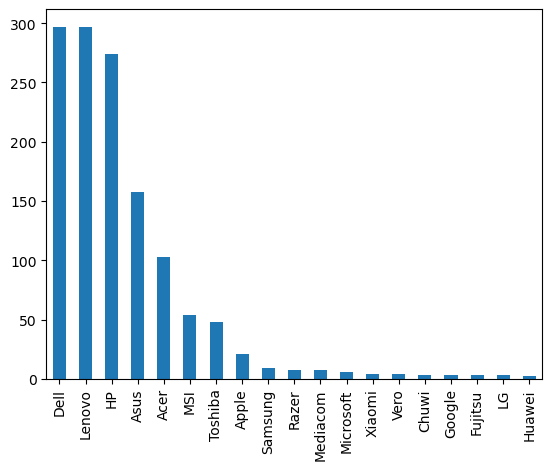

In [32]:
# Bar plot for company feature
df['Company'].value_counts().plot(kind='bar')

In [33]:
Company_frequency_table = df['Company'].value_counts()
Company_frequency_table

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

Most of the laptops are from Dell, Lenova which is 297 and huawei as the least number of laptops that is 2.

<AxesSubplot:>

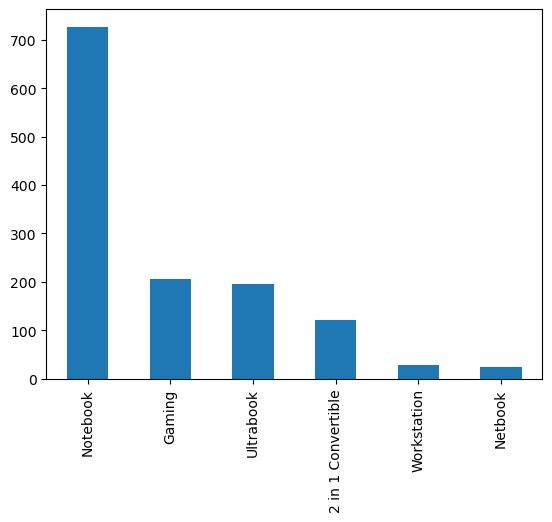

In [34]:
# Bar plot for TypeName feature
df['TypeName'].value_counts().plot(kind='bar')

In [35]:
TypeName_frequency_table = df['TypeName'].value_counts()
TypeName_frequency_table

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

Most Preferred laptops are Notebook type at the range of 727 and netbook type Laptops are less preferred and their count is 25.

<AxesSubplot:xlabel='Inches', ylabel='Density'>

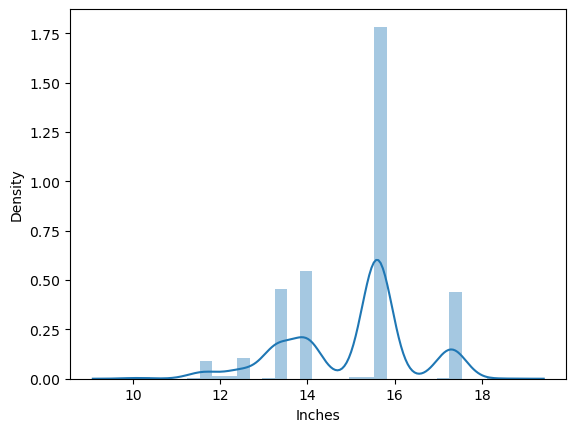

In [36]:
#distribution plot for Inches feature
sns.distplot(df['Inches'])

Most of the laptops that are getting sold are below 16 inches.

<AxesSubplot:xlabel='Ram_GB', ylabel='Density'>

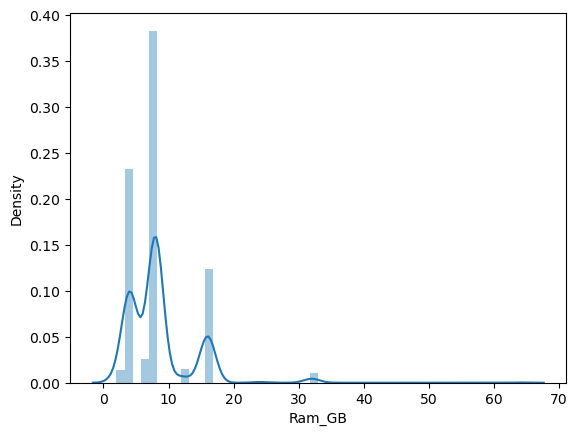

In [37]:
#distribution plot for Ram_GB feature
sns.distplot(df['Ram_GB'])

Most of the laptops are 8GB Ram laptops

In [38]:
#Frequency table for operating System
OpSys_frequency_table = df['OpSys'].value_counts()
OpSys_frequency_table

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

Windows 10 is the most used operating system.

<AxesSubplot:xlabel='Weight', ylabel='Density'>

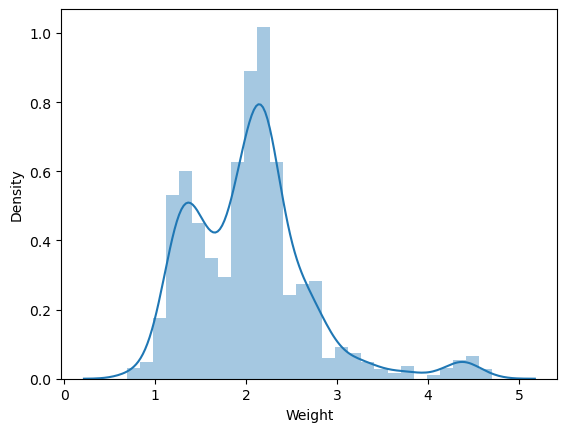

In [39]:
#distribution plot for Weight feature
sns.distplot(df['Weight'])

Most of the laptops are weight in the range of 1.7Kg to 2.5Kg.

In [40]:
#Frequency table for Display Type System
DisplayType_frequency_table = df['DisplayType'].value_counts()
DisplayType_frequency_table

Full HD                                821
IPS Panel Full HD                      235
IPS Panel Full HD / Touchscreen         53
Full HD / Touchscreen                   47
Touchscreen                             32
IPS Panel Retina Display                17
Quad HD+ / Touchscreen                  15
IPS Panel Touchscreen                   13
IPS Panel 4K Ultra HD                   12
IPS Panel 4K Ultra HD / Touchscreen     11
IPS Panel                               11
4K Ultra HD / Touchscreen               10
4K Ultra HD                              7
IPS Panel Quad HD+ / Touchscreen         6
IPS Panel Quad HD+                       5
Quad HD+                                 3
IPS Panel Touchscreen / 4K Ultra HD      2
Touchscreen / Quad HD+                   1
Touchscreen / Full HD                    1
Touchscreen / 4K Ultra HD                1
Name: DisplayType, dtype: int64

Most of the laptops are FULL HD display type laptops at the value count of 821.

<AxesSubplot:xlabel='ScreenResolution_x', ylabel='Density'>

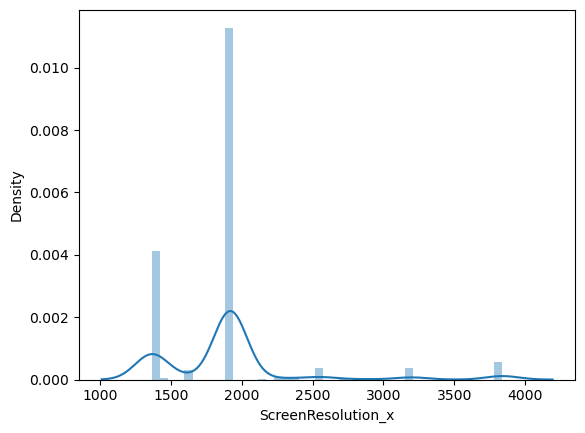

In [41]:
#distribution plot for ScreenResolution_x feature
sns.distplot(df['ScreenResolution_x'])

<AxesSubplot:xlabel='ScreenResolution_y', ylabel='Density'>

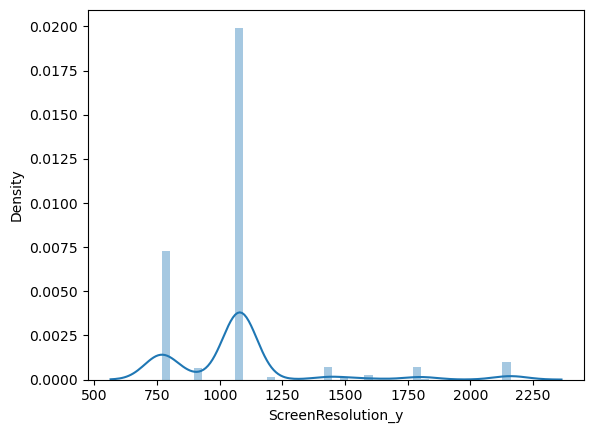

In [42]:
#distribution plot for ScreenResolution_y feature
sns.distplot(df['ScreenResolution_y'])

Most of the laptops are in the resolution of 1920x1080

In [43]:
#Frequency table for CpuBrand Type System
CpuBrand_frequency_table = df['CpuBrand'].value_counts()
CpuBrand_frequency_table

Intel Core i5 7200U     193
Intel Core i7 7700HQ    147
Intel Core i7 7500U     135
Intel Core i3 6006U      81
Intel Core i7 8550U      73
                       ... 
AMD FX 9830P              1
Intel Core i5 6440HQ      1
AMD E-Series E2-6110      1
AMD Ryzen 1600            1
Intel Core i7 6920HQ      1
Name: CpuBrand, Length: 93, dtype: int64

Most of the Laptops are Intel Core i5 7200u Brand

<AxesSubplot:xlabel='CpuSpeed', ylabel='Density'>

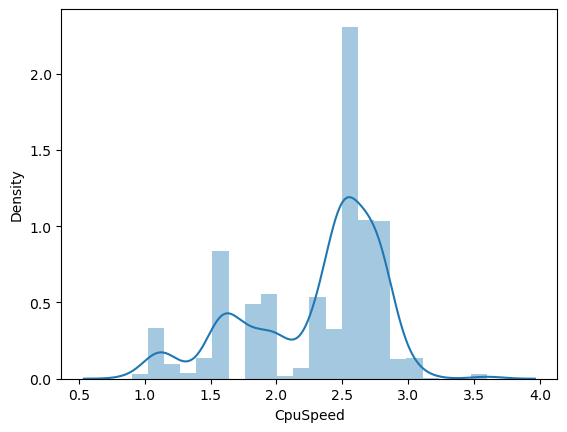

In [44]:
#distribution plot for CpuSpeed feature
sns.distplot(df['CpuSpeed'])

Most of the laptops Cpu speed is around 2.5

In [45]:
#Frequency table for GpuModel Type System
GpuModel_frequency_table = df['GpuModel'].value_counts()
GpuModel_frequency_table

Intel HD Graphics           610
Nvidia GeForce GTX          207
Nvidia GeForce              127
AMD Radeon                   80
Intel UHD Graphics           68
AMD Radeon R5                43
Nvidia Quadro                31
Intel HD                     29
Nvidia GeForce GTX 1050      28
AMD Radeon R7                25
AMD Radeon RX                12
Intel Iris Plus Graphics     10
AMD Radeon R4                 5
AMD FirePro                   5
Nvidia GeForce GT             5
AMD Radeon R2                 4
Intel Iris Graphics           3
AMD Radeon Pro                3
AMD R4                        1
Intel Iris Pro                1
Nvidia GTX 980                1
AMD                           1
Nvidia GeForce GTX1050        1
Intel Graphics                1
AMD Radeon R9                 1
ARM Mali T860                 1
Name: GpuModel, dtype: int64

Mostly Intel HD Graphics card is used.

<AxesSubplot:xlabel='Memory_SSD', ylabel='Density'>

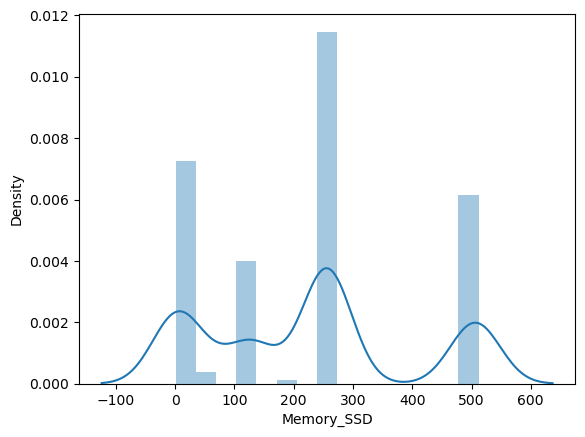

In [46]:
#distribution plot for Memory_SSD feature
sns.distplot(df['Memory_SSD'])

Mostly laptops are around 256 SSD.

##### Bi-variate Analysis

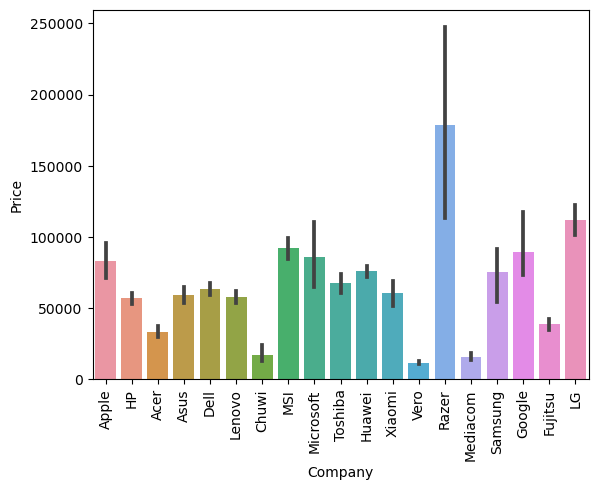

In [47]:
# Company with respect to price
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Razer laptops mostly sold which are in the range of 1200000 to 250000

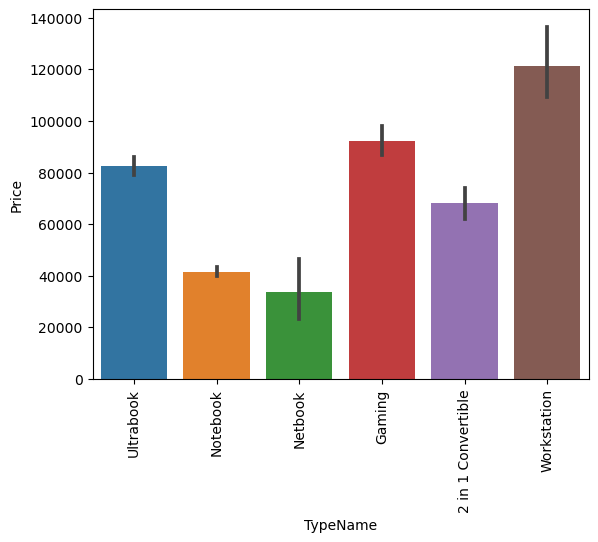

In [48]:
# TypeName with respect to price
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Price'>

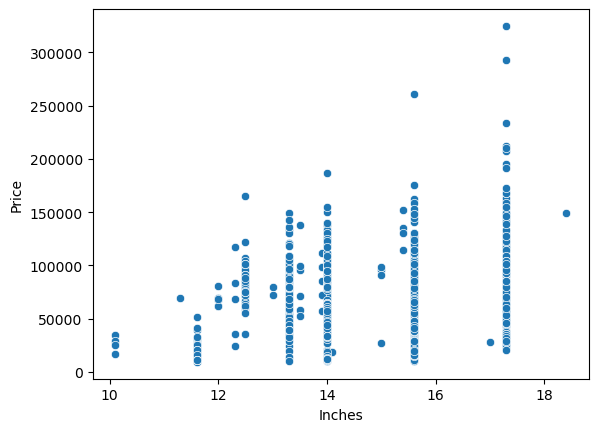

In [49]:
#scatter plot of inches with respect to price
sns.scatterplot(x = df['Inches'], y = df['Price'])

<AxesSubplot:xlabel='Ram_GB', ylabel='Price'>

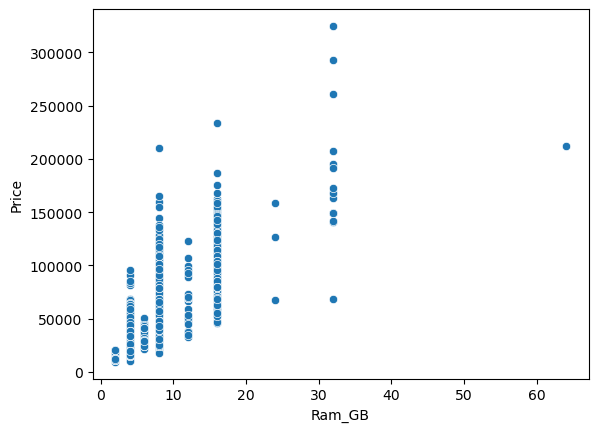

In [50]:
#scatter plot of Ram_GB with respect to price
sns.scatterplot(x = df['Ram_GB'], y = df['Price'])

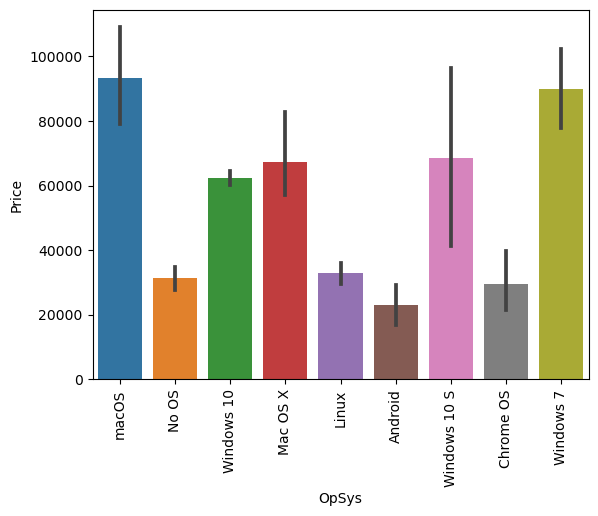

In [51]:
# Operating system with respect to price
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Weight', ylabel='Price'>

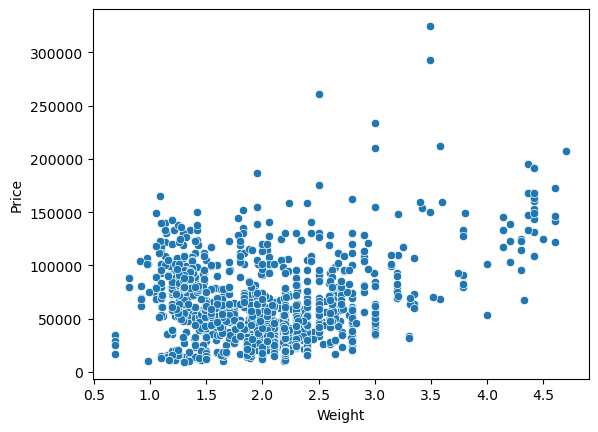

In [52]:
#scatter plot of Weight with respect to price
sns.scatterplot(x = df['Weight'], y = df['Price'])

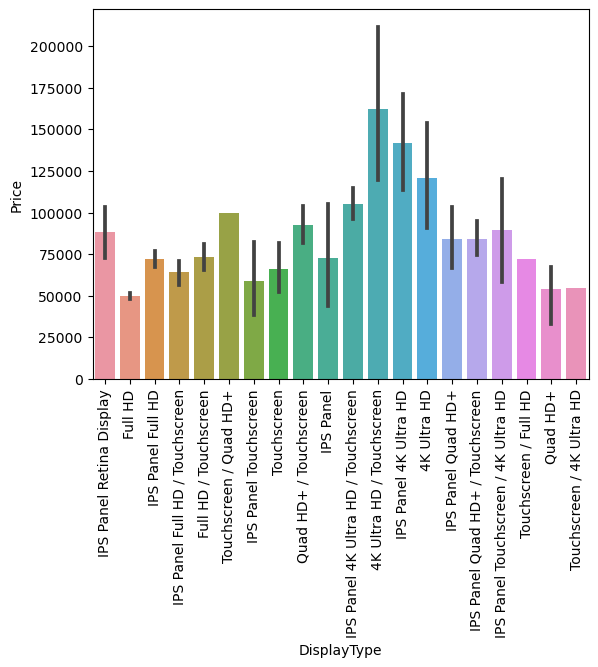

In [53]:
# DisPlay Type with respect to price
sns.barplot(x=df['DisplayType'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='ScreenResolution_x', ylabel='Price'>

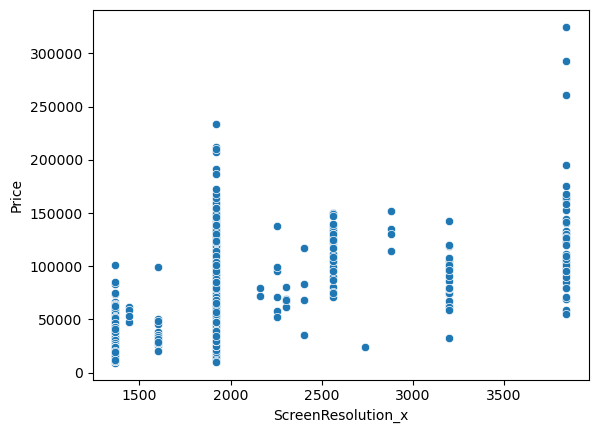

In [54]:
#scatter plot of ScreenResolution in x_dimension with respect to price
sns.scatterplot(x = df['ScreenResolution_x'], y = df['Price'])

<AxesSubplot:xlabel='ScreenResolution_y', ylabel='Price'>

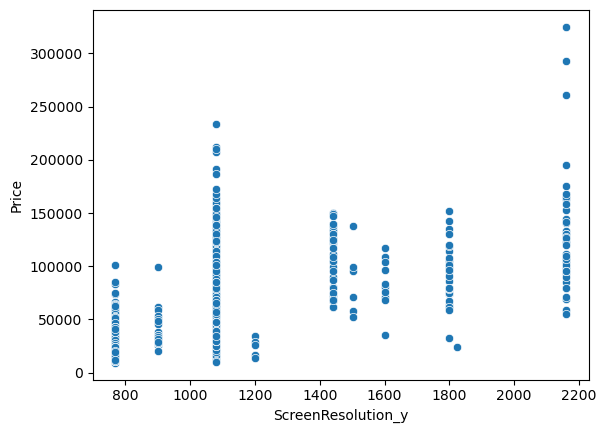

In [55]:
#scatter plot of ScreenResolution in y_dimension with respect to price
sns.scatterplot(x = df['ScreenResolution_y'], y = df['Price'])

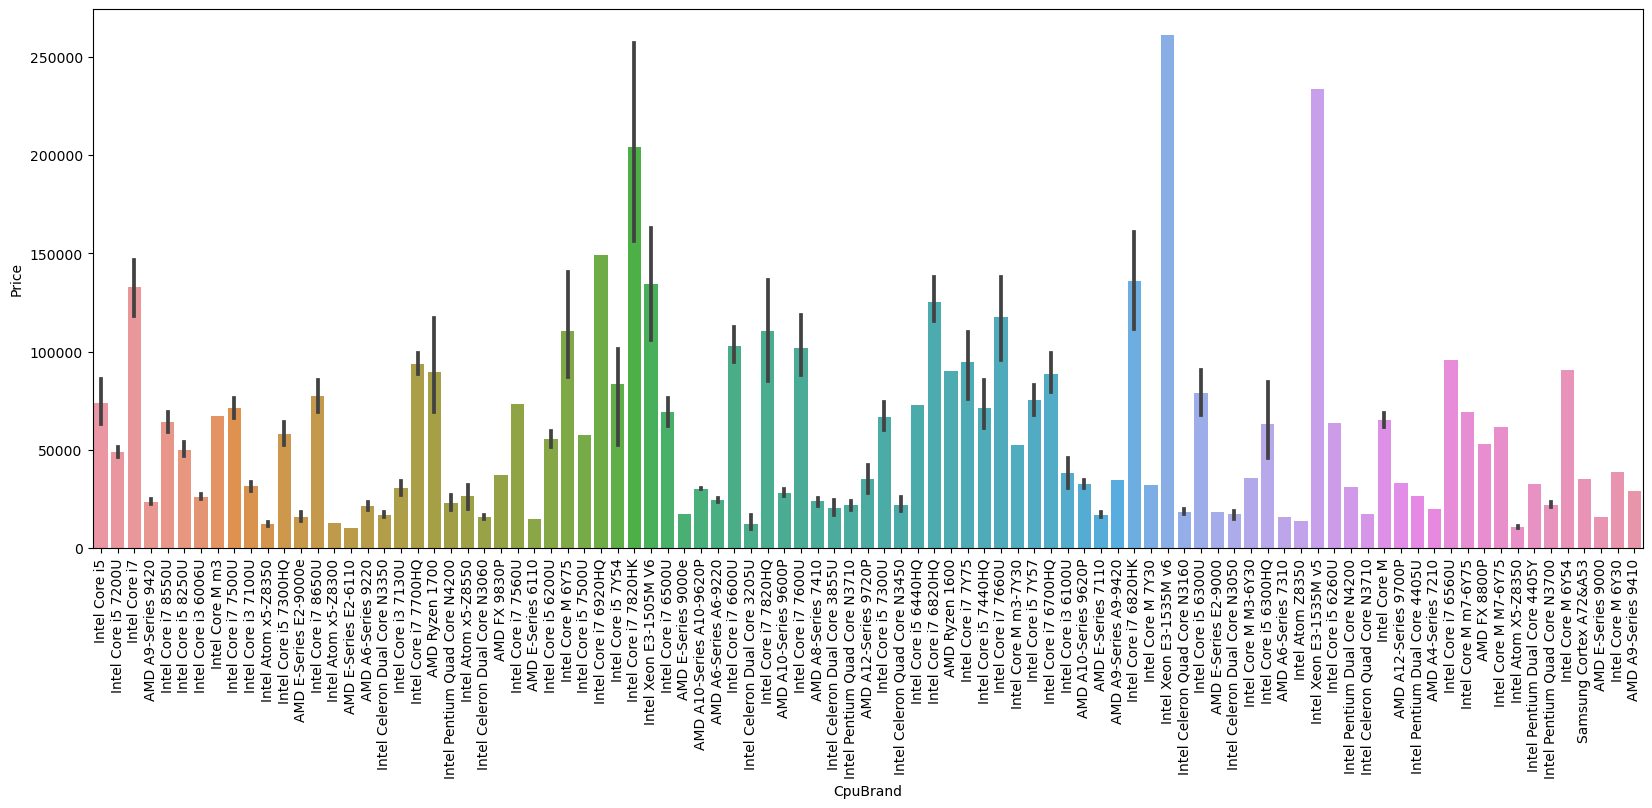

In [56]:
# CpuBrand with respect to price
plt.figure(figsize=(20, 7))
sns.barplot(x=df['CpuBrand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='CpuSpeed', ylabel='Price'>

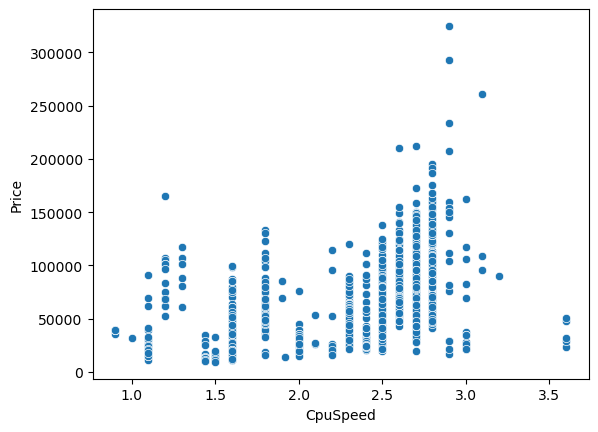

In [57]:
#scatter plot of Cpu Speed with respect to price
sns.scatterplot(x = df['CpuSpeed'], y = df['Price'])

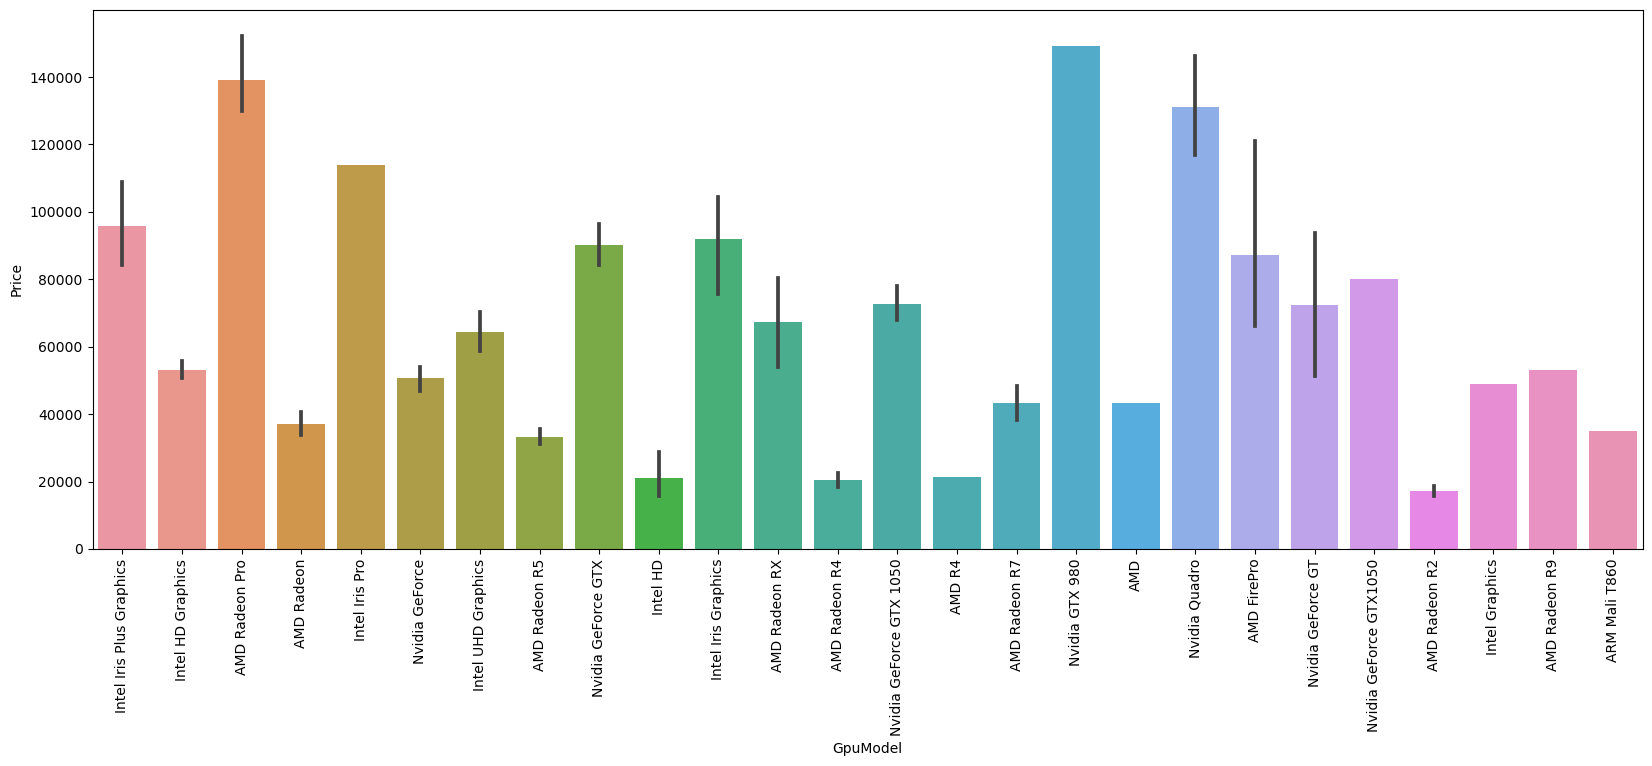

In [58]:
# GpuModel with respect to price
plt.figure(figsize=(20, 7))
sns.barplot(x=df['GpuModel'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='GpuUnits', ylabel='Price'>

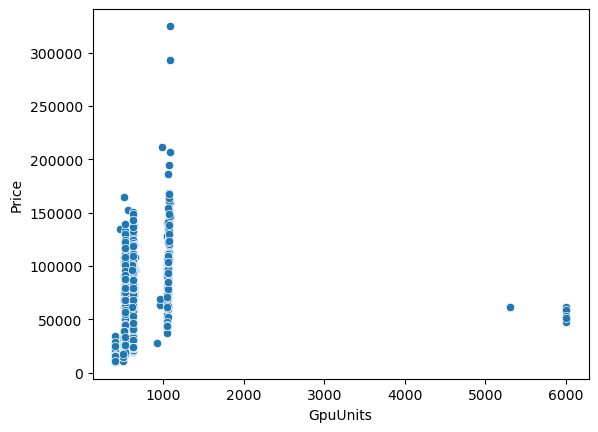

In [59]:
#scatter plot of Gpu Units with respect to price
sns.scatterplot(x = df['GpuUnits'], y = df['Price'])

<AxesSubplot:xlabel='Memory_SSD', ylabel='Price'>

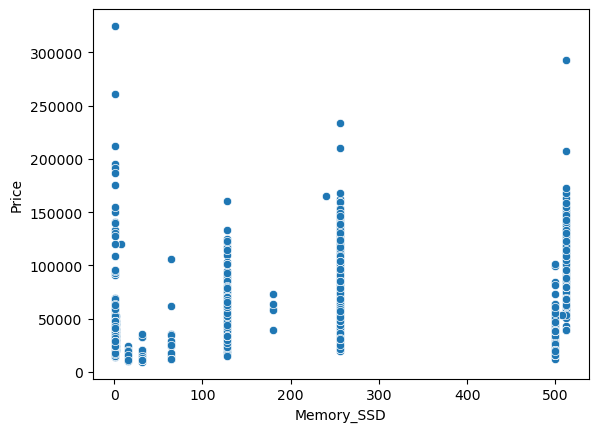

In [60]:
#scatter plot of Memory with respect to price
sns.scatterplot(x = df['Memory_SSD'], y = df['Price'])

##### Multivariate Analysis

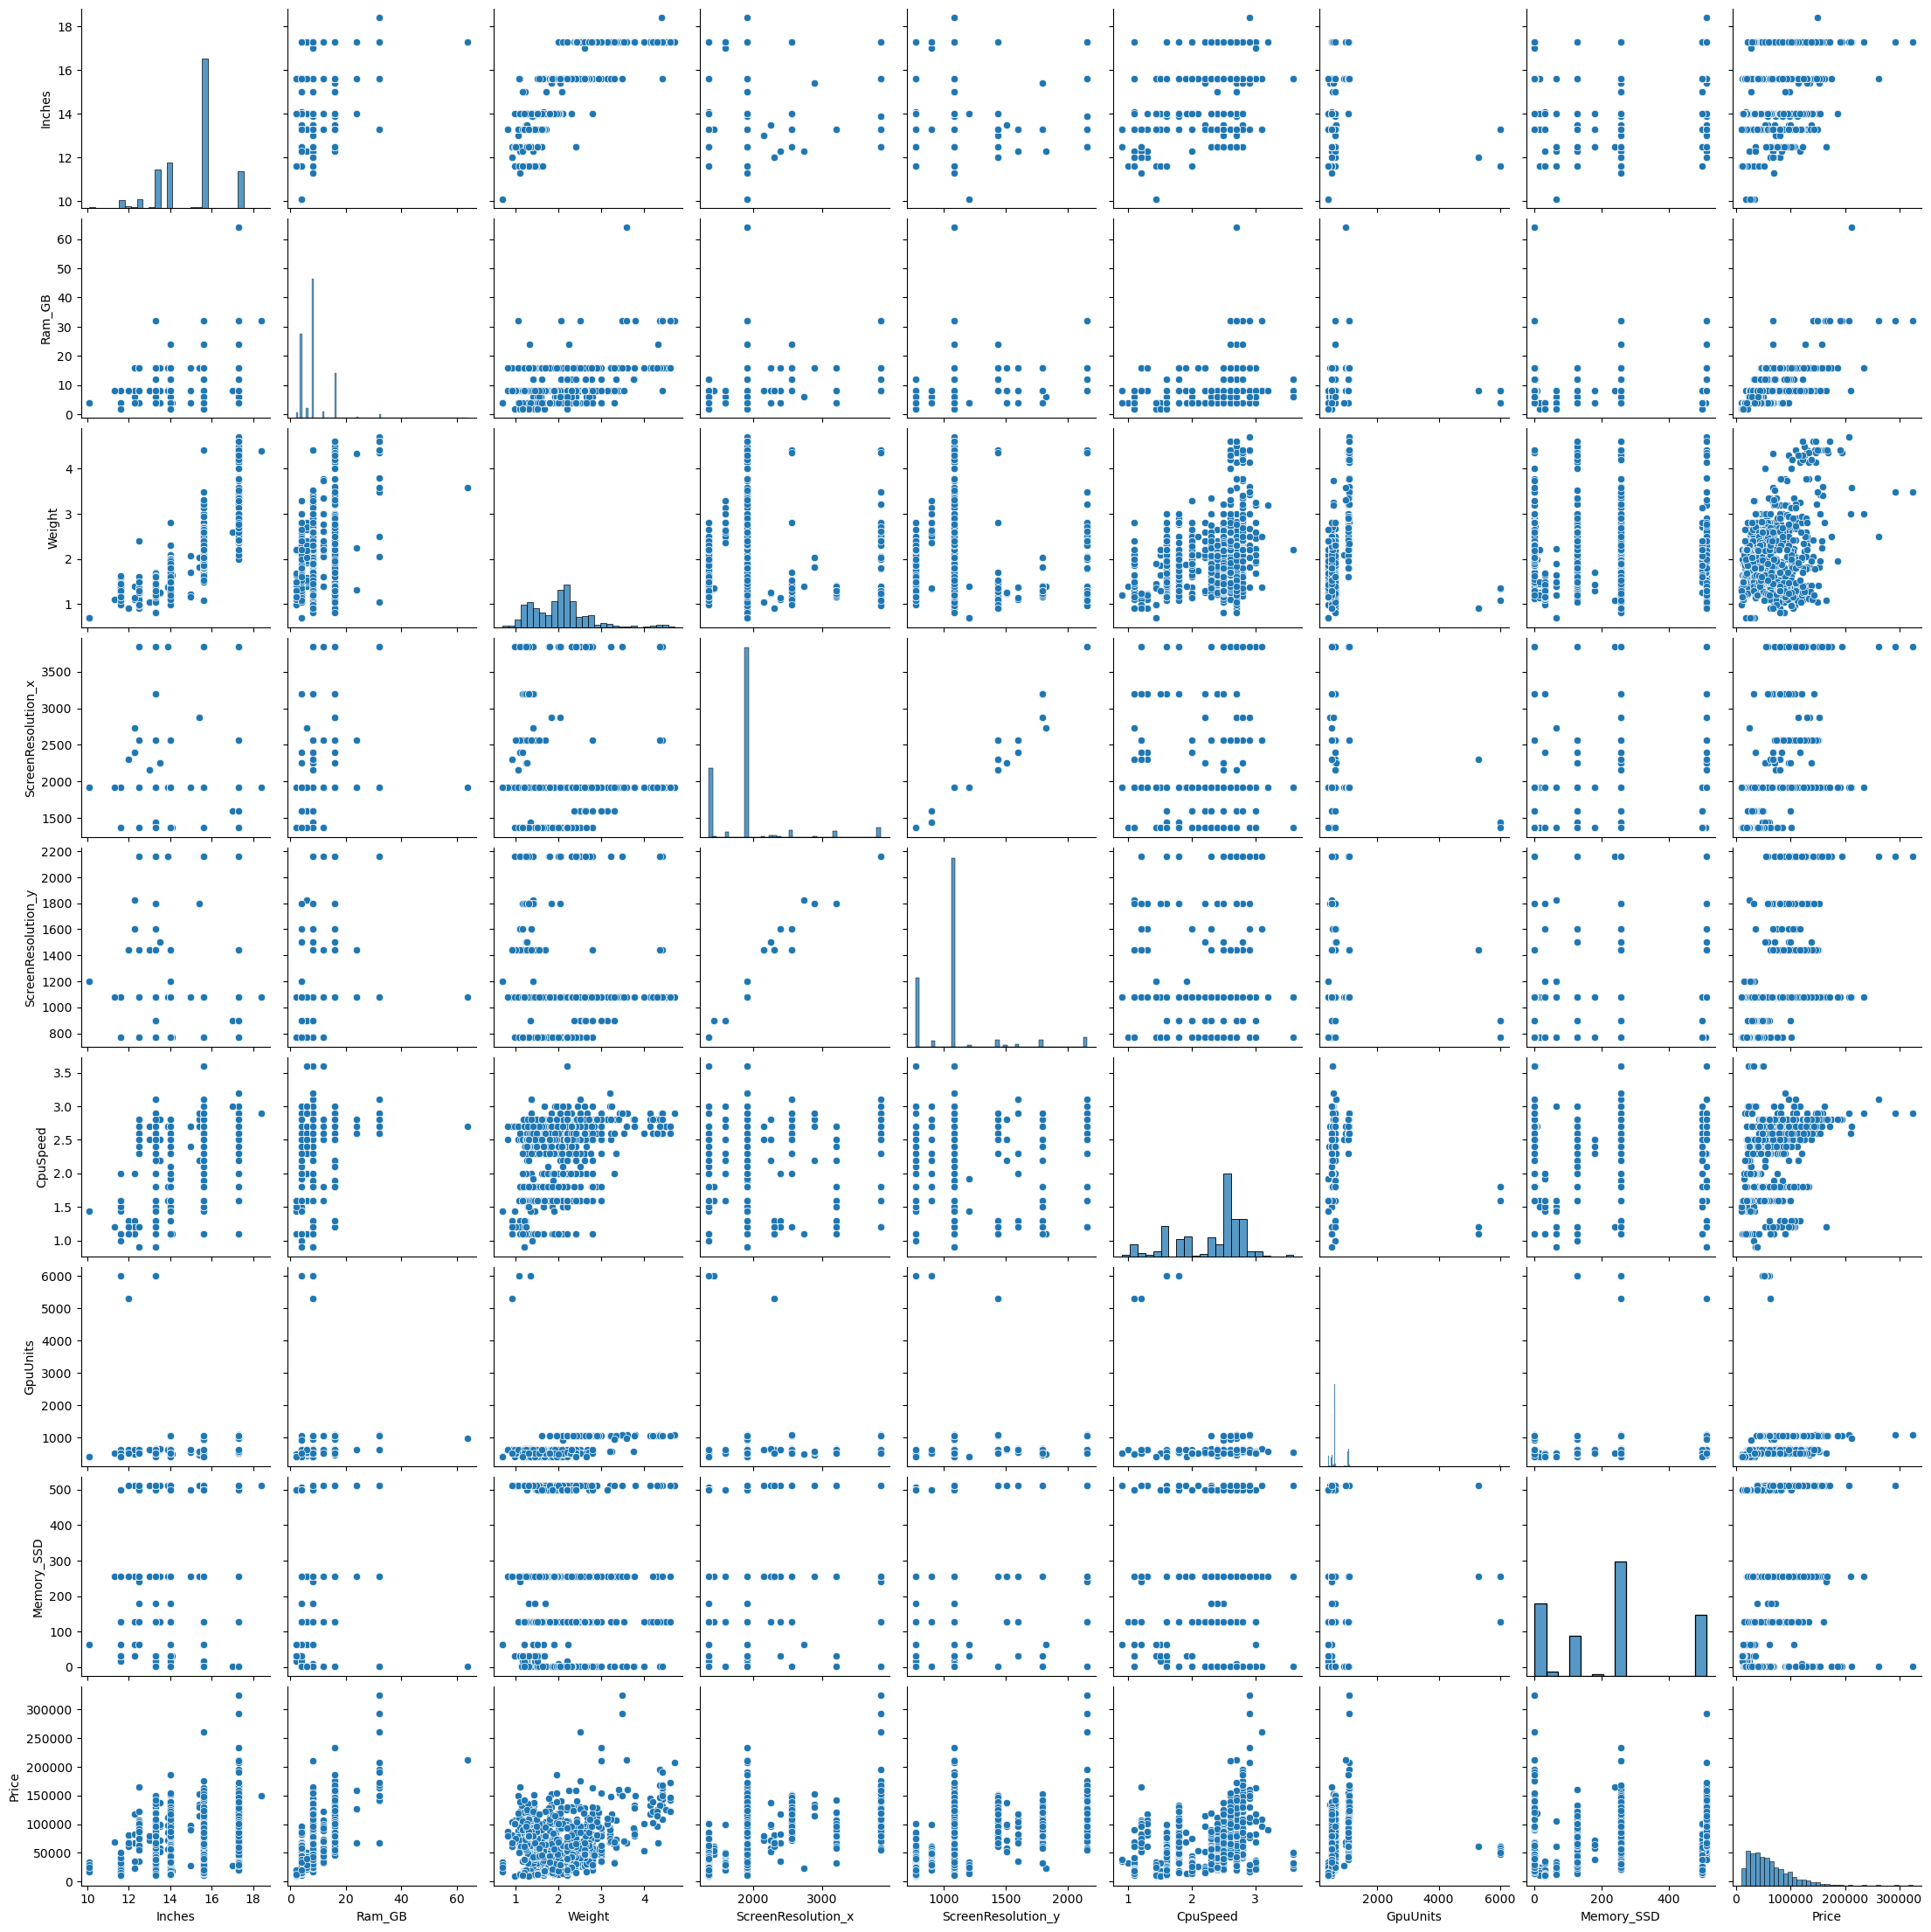

In [61]:
sns.pairplot(df)

<AxesSubplot:>

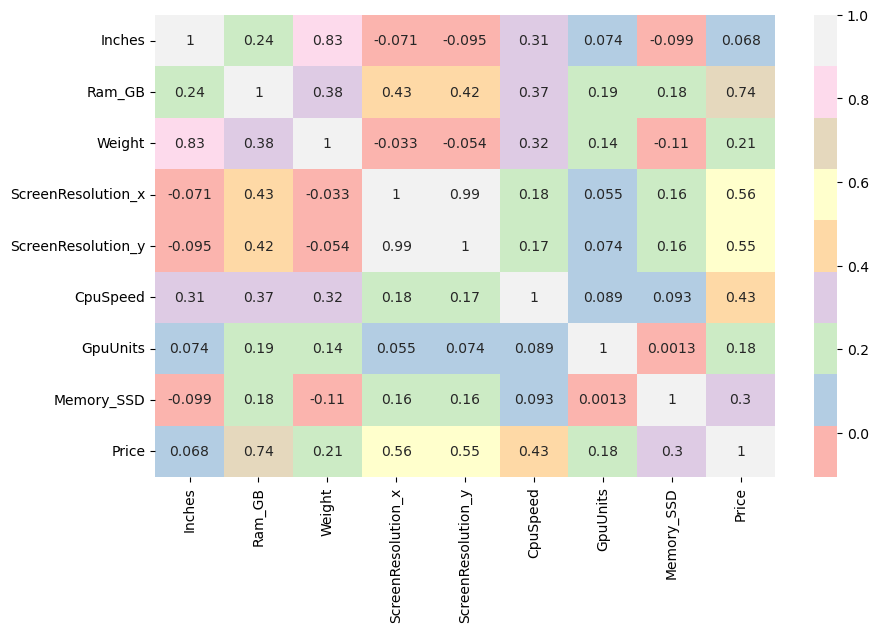

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='Pastel1')

In [63]:
df.corr()

,Inches,Ram_GB,Weight,ScreenResolution_x,ScreenResolution_y,CpuSpeed,GpuUnits,Memory_SSD,Price
Inches,1.000000,0.237993,0.827631,-0.071245,-0.095404,0.307870,0.073772,-0.098539,0.068197
Ram_GB,0.237993,1.000000,0.383874,0.433121,0.424437,0.368000,0.193083,0.184002,0.743007
Weight,0.827631,0.383874,1.000000,-0.032880,-0.053846,0.320434,0.144735,-0.105692,0.210370
ScreenResolution_x,-0.071245,0.433121,-0.032880,1.000000,0.994219,0.183548,0.054966,0.155234,0.556529
ScreenResolution_y,-0.095404,0.424437,-0.053846,0.994219,1.000000,0.169668,0.073514,0.156442,0.552809
CpuSpeed,0.307870,0.368000,0.320434,0.183548,0.169668,1.000000,0.088800,0.093193,0.430293
GpuUnits,0.073772,0.193083,0.144735,0.054966,0.073514,0.088800,1.000000,0.001250,0.182658
Memory_SSD,-0.098539,0.184002,-0.105692,0.155234,0.156442,0.093193,0.001250,1.000000,0.298177
Price,0.068197,0.743007,0.210370,0.556529,0.552809,0.430293,0.182658,0.298177,1.000000


##### Check for Linearity of independent features with respect to the label

<AxesSubplot:xlabel='Inches', ylabel='Price'>

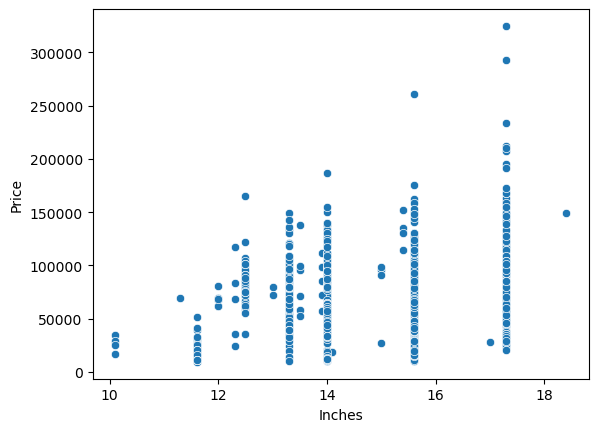

In [64]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

<AxesSubplot:xlabel='Ram_GB', ylabel='Price'>

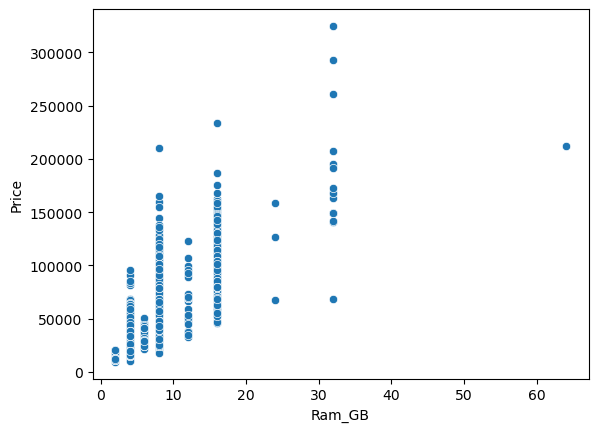

In [65]:
sns.scatterplot(x = df['Ram_GB'], y = df['Price'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

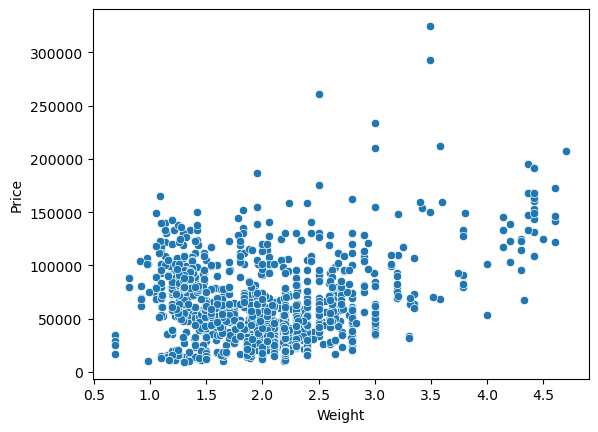

In [66]:
sns.scatterplot(x = df['Weight'], y = df['Price'])

<AxesSubplot:xlabel='ScreenResolution_x', ylabel='Price'>

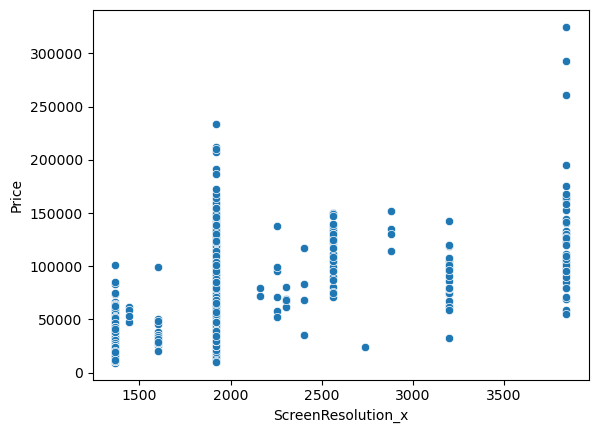

In [67]:
sns.scatterplot(x = df['ScreenResolution_x'], y = df['Price'])

<AxesSubplot:xlabel='ScreenResolution_y', ylabel='Price'>

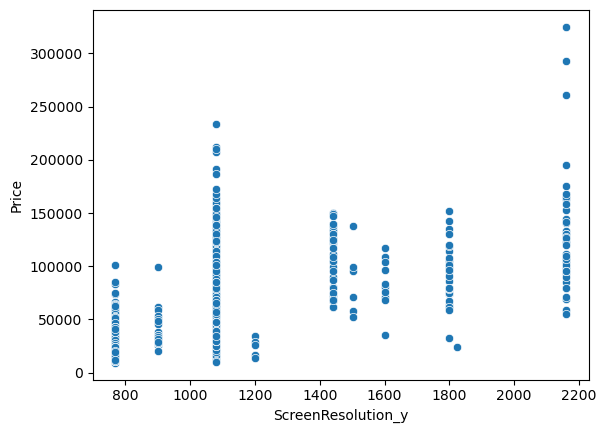

In [68]:
sns.scatterplot(x = df['ScreenResolution_y'], y = df['Price'])

<AxesSubplot:xlabel='CpuSpeed', ylabel='Price'>

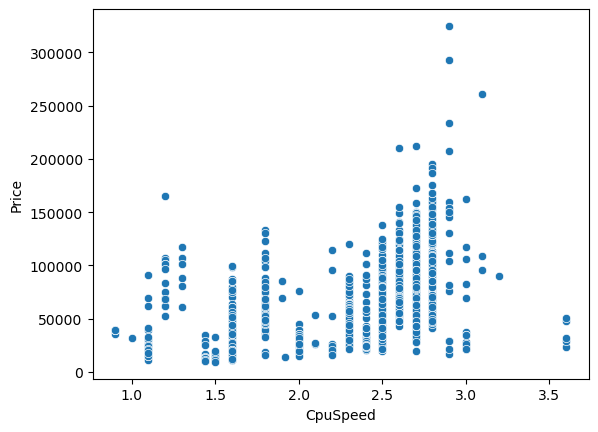

In [69]:
sns.scatterplot(x = df['CpuSpeed'], y = df['Price'])

<AxesSubplot:xlabel='GpuUnits', ylabel='Price'>

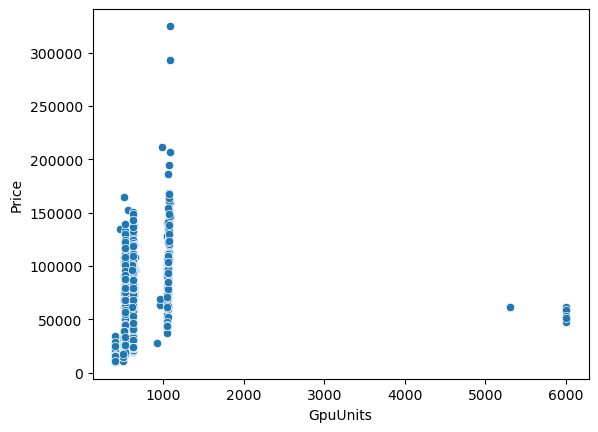

In [70]:
sns.scatterplot(x = df['GpuUnits'], y = df['Price'])

<AxesSubplot:xlabel='Memory_SSD', ylabel='Price'>

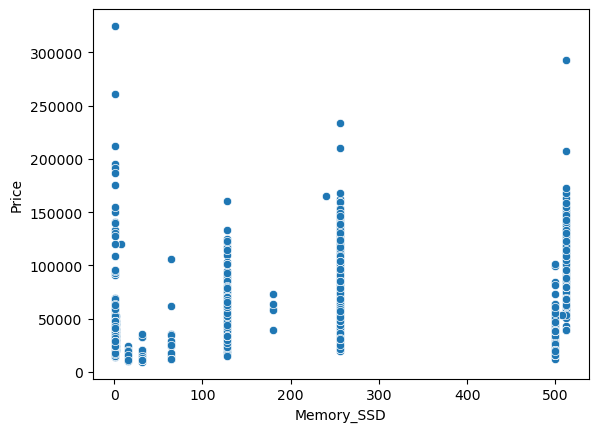

In [71]:
sns.scatterplot(x = df['Memory_SSD'], y = df['Price'])

-> Features with are linearly co-related to price:
Ram_GB: 0.743007, 
ScreenResolution_x: 0.556529, 
ScreenResolution_y: 0.552809, 
CpuSpeed: 0.430293. 
    
->Features with are not linearly co-related to price:
Inches: 0.068197, 
Weight: 0.210370, 
GpuUnits: 0.182658, 
Memory_SSD: 0.298177.

###### Multicolinearity Check

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop rows with missing values
#data.dropna(inplace=True)

# Select the predictor variables (features) for VIF calculation
predictors = df[['Ram_GB', 'ScreenResolution_x', 'ScreenResolution_y', 'CpuSpeed']]

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Variable'] = predictors.columns
vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Print the VIF values
vif

,Variable,VIF
0,Ram_GB,4.837516
1,ScreenResolution_x,1389.417721
2,ScreenResolution_y,1336.950537
3,CpuSpeed,12.255503


In [73]:
# Select the predictor variables (features) for VIF calculation
predictors = df[['Ram_GB', 'ScreenResolution_y', 'CpuSpeed']]

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Variable'] = predictors.columns
vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Print the VIF values
vif

,Variable,VIF
0,Ram_GB,4.820551
1,ScreenResolution_y,12.270000
2,CpuSpeed,11.637443


In [74]:
# Select the predictor variables (features) for VIF calculation
predictors = df[['Ram_GB','CpuSpeed']]

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Variable'] = predictors.columns
vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

# Print the VIF values
vif

,Variable,VIF
0,Ram_GB,4.302252
1,CpuSpeed,4.302252


Ram_GB and CpuSpeed dosent have multicolinearity

In [75]:
df.head()

,Company,TypeName,Inches,Ram_GB,OpSys,Weight,DisplayType,ScreenResolution_x,ScreenResolution_y,CpuBrand,CpuSpeed,GpuModel,GpuUnits,Memory_SSD,Price
0,Apple,Ultrabook,13.3,8,macOS,1.37,IPS Panel Retina Display,2560,1600,Intel Core i5,2.3,Intel Iris Plus Graphics,640.0,128,71378.6832
1,Apple,Ultrabook,13.3,8,macOS,1.34,Full HD,1440,900,Intel Core i5,1.8,Intel HD Graphics,6000.0,128,47895.5232
2,HP,Notebook,15.6,8,No OS,1.86,Full HD,1920,1080,Intel Core i5 7200U,2.5,Intel HD Graphics,620.0,256,30636.0000
3,Apple,Ultrabook,15.4,16,macOS,1.83,IPS Panel Retina Display,2880,1800,Intel Core i7,2.7,AMD Radeon Pro,455.0,512,135195.3360
4,Apple,Ultrabook,13.3,8,macOS,1.37,IPS Panel Retina Display,2560,1600,Intel Core i5,3.1,Intel Iris Plus Graphics,650.0,256,96095.8080


In [76]:
df_num = df[['Ram_GB', 'CpuSpeed']]
df_cat = df[['Company','TypeName','OpSys','DisplayType','CpuBrand','GpuModel']]

In [77]:
#encoding the categorical features
from sklearn.preprocessing import OneHotEncoder

#encoding the categorical data
ohe = OneHotEncoder()
ohe.fit_transform(df_cat).toarray()

#assinging the dataframe for encoded categorical data
df_cat_encoded = pd.DataFrame(ohe.fit_transform(df_cat).toarray(), columns= ohe.get_feature_names_out())

In [78]:
#conctatinating the numerical and categorical datfarmes
X = pd.concat([df_num,df_cat_encoded],axis=1)
X.shape

(1303, 175)

In [79]:
X.head()

,Ram_GB,CpuSpeed,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,...,GpuModel_Intel Iris Plus Graphics,GpuModel_Intel Iris Pro,GpuModel_Intel UHD Graphics,GpuModel_Nvidia GTX 980,GpuModel_Nvidia GeForce,GpuModel_Nvidia GeForce GT,GpuModel_Nvidia GeForce GTX,GpuModel_Nvidia GeForce GTX 1050,GpuModel_Nvidia GeForce GTX1050,GpuModel_Nvidia Quadro
0,8,2.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,1.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,16,2.7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,3.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
y = df['Price']

In [81]:
#splitting the data into Train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#shape of the train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((912, 175), (391, 175), (912,), (391,))

In [82]:
#calling the linear regression model
from sklearn.linear_model import LinearRegression

# calling the model
lr = LinearRegression()

#fitting the model
model = lr.fit(X_train, y_train)

In [83]:
# Get the coefficients
coefficients = model.coef_
coefficients

array([ 2.99391344e+03,  1.12962861e+04, -2.28490004e+14,  5.47269425e+14,
       -2.28490004e+14, -2.28490004e+14, -2.28490004e+14, -2.28490004e+14,
       -2.28490004e+14, -2.28490004e+14, -2.28490004e+14, -2.28490004e+14,
       -2.28490004e+14, -2.28490004e+14, -2.28490004e+14, -2.28490004e+14,
       -2.28490004e+14, -2.28490004e+14, -2.28490004e+14, -2.28490004e+14,
       -2.28490004e+14,  3.09081399e+14,  3.09081399e+14,  3.09081399e+14,
        3.09081399e+14,  3.09081399e+14,  3.09081399e+14,  1.33759389e+14,
        1.33759389e+14,  1.33759389e+14, -5.03156203e+14,  1.33759389e+14,
        1.33759389e+14,  1.33759389e+14,  1.33759389e+14, -5.03156203e+14,
        8.43488038e+14,  8.43488038e+14,  8.43488038e+14,  8.43488038e+14,
        8.43488038e+14,  8.43488038e+14,  8.43488038e+14,  8.43488038e+14,
        8.43488038e+14,  8.43488038e+14,  8.43488038e+14,  8.43488038e+14,
        8.43488038e+14,  8.43488038e+14,  8.43488038e+14,  8.43488038e+14,
        8.43488038e+14,  

In [84]:
train_preds =model.predict(X_train)
train_preds

array([ 45351.25,  58312.  ,  33268.  ,  69545.  ,  69008.  ,  34965.  ,
        30074.  ,  61751.5 ,  86825.5 ,  33009.  , 123663.  , 163796.  ,
        59409.75,  38840.5 ,  46124.75,  13049.5 ,  39070.5 ,  57982.5 ,
        57763.5 ,   5261.25,  58312.  ,  68969.25,  84091.5 ,  69521.75,
        17955.5 ,  60908.  ,  29919.75, 138032.  ,  76331.5 ,  54668.5 ,
        27837.75,  13791.5 ,  29324.  , 101259.75,  31408.75,  37198.  ,
       136107.5 ,  37011.5 ,  28529.5 ,  13251.  ,  70055.75,  17397.75,
        15921.5 ,  50351.75, 160082.  ,   3053.75, 105745.25,  29918.5 ,
        58495.5 ,  24288.5 ,  15491.  ,  84842.  ,  61019.  ,  33369.75,
        44487.  ,  42328.5 ,  73607.5 ,  68147.5 ,  14459.75,  21585.25,
        70418.5 ,  17644.75,  79849.5 ,  94007.  , 139161.5 ,  69582.5 ,
        75118.  ,  92916.75,  42727.75,  42138.5 ,  59409.75,  17530.  ,
        63475.5 ,  27304.  ,  91219.5 ,  71048.5 ,  30353.  ,  86338.25,
        40491.5 ,  29248.  ,  54038.  , 102083.5 , 

In [85]:
#calling the model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

#train mape
train_MAPE = mean_absolute_percentage_error(train_preds, y_train)
train_MAPE

0.21680308688884414

In [86]:
train_MSE = mean_squared_error(train_preds, y_train)
train_MSE

206651077.66351968

In [87]:
from sklearn.metrics import r2_score

# Calculate R-squared
R2 = r2_score(y_train, train_preds)
R2

0.844228592456527

In [88]:
test_preds = model.predict(X_test)
test_preds

array([ 6.29502500e+04,  5.93010000e+04,  3.08437500e+04,  6.09080000e+04,
        5.89330000e+04,  6.18755000e+04,  2.93240000e+04,  2.36580000e+04,
        7.67287500e+04,  2.63755000e+04,  1.32021500e+05,  4.66540000e+04,
        8.79735000e+04,  4.65635000e+04,  9.40070000e+04,  7.24875000e+04,
        7.70780000e+04,  5.19122500e+04,  7.41120000e+04,  1.09400500e+05,
        1.11390250e+05,  3.78067500e+04,  7.48780000e+04,  8.55995691e+13,
        6.42852500e+04,  7.35685000e+04,  5.75695000e+04,  4.20625000e+04,
        6.96585000e+04,  6.95450000e+04,  3.52357500e+04,  9.51245000e+04,
        7.57900000e+04,  5.37760000e+04,  6.29502500e+04,  4.66732500e+04,
        4.04487500e+04,  2.10105000e+04,  6.97412500e+04, -4.39175000e+03,
        1.21483750e+05,  4.04915000e+04,  7.82295000e+04,  9.06955000e+04,
        2.92480000e+04,  6.79820000e+04,  8.89835000e+04,  1.16570000e+04,
        5.40380000e+04,  7.85165000e+04,  7.46925000e+04,  8.55798837e+13,
        3.43075000e+04,  

In [89]:
#test_MAPE
test_MAPE = mean_absolute_percentage_error(test_preds, y_test)
test_MAPE

0.26267937890323007

In [90]:
test_MSE = mean_squared_error(test_preds, y_test)
test_MSE

2.958570358162135e+27

##### satistical Tests

In [102]:
#creating the data frame for the test results
df_results = pd.DataFrame(columns=['feature_no', 't_statistic', 'p_value'])

In [103]:
import statsmodels.api as sm

for i in range (0,176):
    # Create your regression model
    X_train = sm.add_constant(X_train)  # Add a constant term if necessary
    model = sm.OLS(y_train, X_train)
    results = model.fit()

    # Specify the hypothesis you want to test
    variable_index = i  # Index of the variable you want to test
    hypothesis_matrix = np.zeros(X_train.shape[1])  # Initialize an array of zeros
    hypothesis_matrix[variable_index] = 1  # Set the coefficient of the variable to 1

    #Perform the Wald test
    wald_test = results.wald_test(hypothesis_matrix)

    # Get the test statistic and p-value
    test_statistic = wald_test.statistic[0]
    p_value = wald_test.pvalue
    #adding results to the dataframe
    df_results.loc[i] = [i, test_statistic, p_value]

    # Print the results
    #print('feature index :', i)
    #print("Test statistic:", test_statistic)
    #print("p-value:", p_value)

C:\Users\pooji\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '


In [104]:
df_results

,feature_no,t_statistic,p_value
0,0,[0.541234448491407],0.4621479653035643
1,1,[250.52308185872354],5.3450449169994136e-49
2,2,[1.465949487963187],0.22636125724859418
3,3,[10.506098611565221],0.001241530661502589
4,4,[0.10047946059063814],0.751341845516236
...,...,...,...
171,171,[0.21615880190930878],0.642115259915329
172,172,[0.4305069396926679],0.5119383754038387
173,173,[9.132994502190067],0.002594470804692104
174,174,[1.1552282756341878],0.2827975683153302


In [105]:
Threshold = 0.05
df_results['Significant'] = np.where(df_results['p_value']>Threshold, 'significant', 'not significant')

In [106]:
df_results

,feature_no,t_statistic,p_value,Significant
0,0,[0.541234448491407],0.4621479653035643,significant
1,1,[250.52308185872354],5.3450449169994136e-49,not significant
2,2,[1.465949487963187],0.22636125724859418,significant
3,3,[10.506098611565221],0.001241530661502589,not significant
4,4,[0.10047946059063814],0.751341845516236,significant
...,...,...,...,...
171,171,[0.21615880190930878],0.642115259915329,significant
172,172,[0.4305069396926679],0.5119383754038387,significant
173,173,[9.132994502190067],0.002594470804692104,not significant
174,174,[1.1552282756341878],0.2827975683153302,significant


In [110]:
df_results['Significant'].value_counts()

significant        145
not significant     31
Name: Significant, dtype: int64

###### Residual PLots

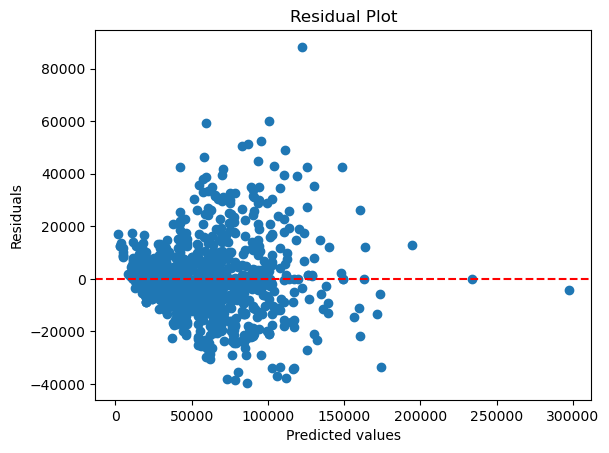

In [112]:
# Calculate the residuals
residuals = y_train - train_preds

# Plot the residuals
plt.scatter(train_preds, residuals)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y = 0
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

##### Q-Q plot

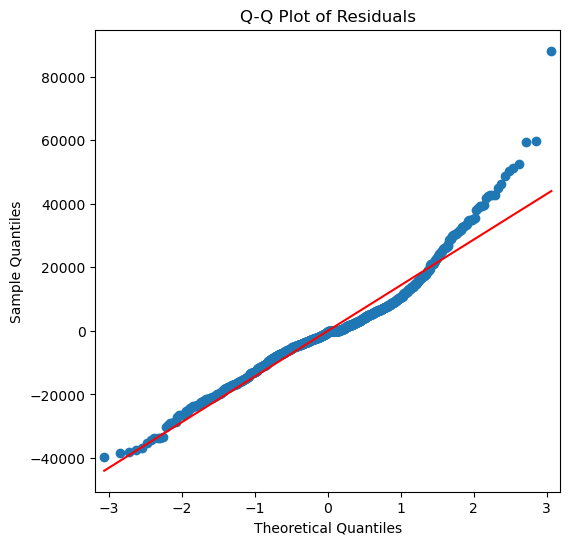

In [118]:
residuals = y_train - train_preds

# Create the Q-Q plot
fig, ax = plt.subplots(figsize=(6, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('Q-Q Plot of Residuals')
plt.show()